In [1]:
import csv
import pandas as pd
import numpy as np
from math import *

In [2]:
filename = 'OD_EU_Cellular_100m.csv'
with open(filename, 'r') as f:
    raw_data_100m = csv.reader(f)
    raw_data_100m_list = list(raw_data_100m)
    raw_data_100m_list = np.array(raw_data_100m_list)
    
sample_num = len(raw_data_100m_list)
    
raw_data_100m_dict = {'Cell grid code': np.array(raw_data_100m_list[:,0]),
                      'X coordinate (int)': np.array(raw_data_100m_list[:,1]),
                      'Y coordinate (int)': np.array(raw_data_100m_list[:,2]),
                      'Technology of connection': np.array(raw_data_100m_list[:,3]),
                      'Signal strength (dBm)': np.array(map(float,raw_data_100m_list[:,4])),
                      'Standard deviation': np.array(raw_data_100m_list[:,5]),
                      'Measurements': np.array(raw_data_100m_list[:,6])
                     }

In [5]:
def dB2Linear( snr_in_dB ):
    snr_in_linear = np.power( 10, snr_in_dB/10 )
    return snr_in_linear

In [7]:
user_num = 10
per_user_sample_num = int(sample_num / user_num)
user_signal_list_dB = np.array( [ [ raw_data_100m_dict['Signal strength (dBm)'][i*per_user_sample_num + j ] 
                                for j in range(per_user_sample_num) ] for i in range(user_num) ] )

In [8]:
user_signal_list = map(dB2Linear, user_signal_list_dB) 
# row is for each user, and there is 10 rows in total (i.e. 10 users in total)
# column is for sample, and for each user there is 15950 samples in total

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

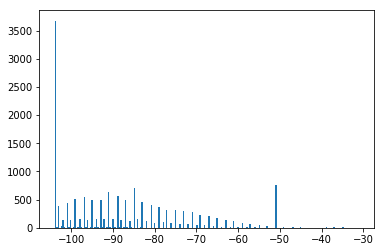

In [11]:
plt.hist(user_signal_list_dB[9].tolist(),200);

In [68]:
from sklearn.neighbors.kde import KernelDensity

In [69]:
X = user_signal_list_dB[0][:, np.newaxis]

In [100]:
X_plot = np.linspace(-120, -30, 1000)[:, np.newaxis]

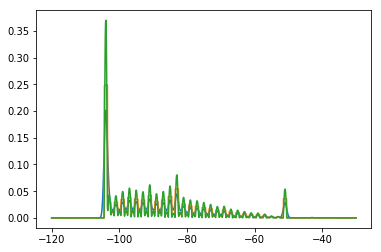

In [101]:
for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))